#**Airbnb Bookings Analysis** 
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



In [ ]:
#Import package
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File

file_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
airbnb_df.isna().sum()
# ( airbnb_df.isna().sum() ) / len(airbnb_df) *100
# the above line gives the % of null values in every column which is very helpfull when we want to deal with the null values.

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
airbnb_df.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355


In [ ]:
airbnb_df.isna().sum()

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
dtype: int64

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

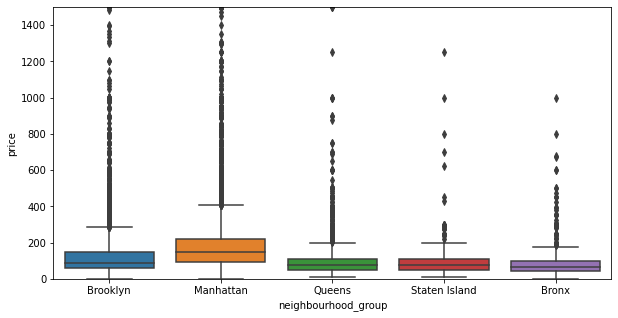

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1500)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
len(airbnb_df[airbnb_df['price']>500])

1044

In [ ]:
airbnb_df['price'][airbnb_df['price']>600] = 600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


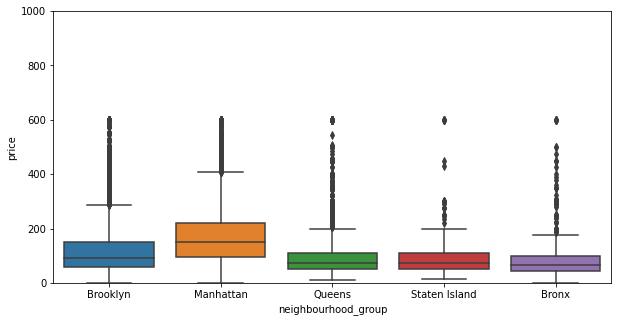

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
airbnb_df.groupby(['neighbourhood_group'],dropna=True)['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

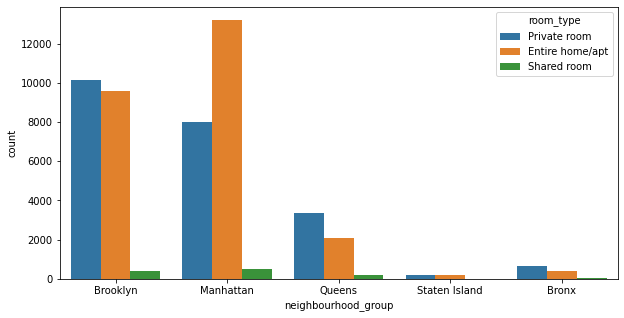

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df)
plt.show()

In [ ]:
n = airbnb_df.neighbourhood_group.unique()
nbd_grp = list(n)

In [ ]:
def plot_nbd():
  plt.figure(figsize=(10,5))
  nbd_cnts=[]
  for i in nbd_grp:
    nbd_cnts.append(airbnb_df['id'][airbnb_df['neighbourhood_group']==i].value_counts().sum())
    
  plt.plot(nbd_grp,nbd_cnts)

  plt.legend(nbd_grp)
  print(nbd_cnts)

[20104, 21661, 5666, 373, 1091]


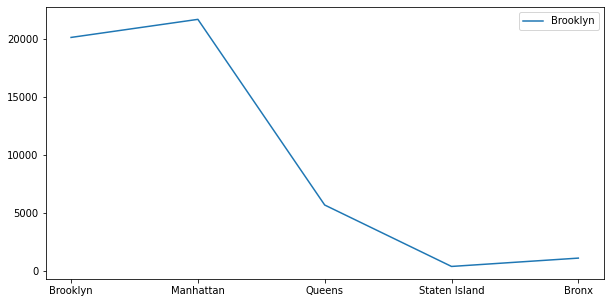

In [ ]:
plot_nbd()

In [ ]:
airbnb_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

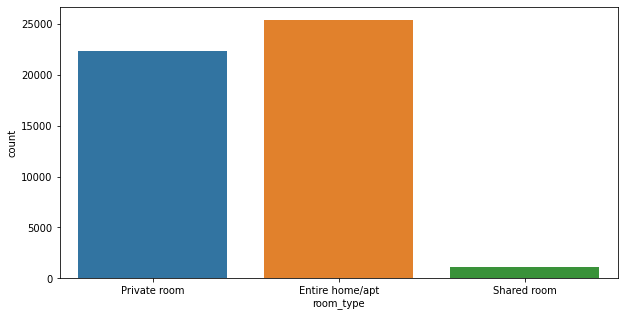

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='room_type', data= airbnb_df)
plt.show()

([<matplotlib.patches.Wedge at 0x7fcb82829650>,
 [Text(-0.19589098201007532, -1.0824170744990715, 'Manhattan'),
  Text(0.6544005041792901, 0.8841719177455768, 'Brooklyn'),
  Text(-0.9365212904925622, 0.5769990229230428, 'Queens'),
  Text(-1.0923467232360349, 0.12953237524070008, 'Bronx'),
  Text(-1.0996841146061016, 0.02635997122522387, 'Staten Island')],
 [Text(-0.10684962655095016, -0.5904093133631299, '44.3%'),
  Text(0.35694572955234, 0.4822755914975873, '41.1%'),
  Text(-0.5108297948141248, 0.3147267397762052, '11.6%'),
  Text(-0.5958254854014735, 0.07065402285856368, '2.2%'),
  Text(-0.5998276988760554, 0.014378166122849381, '0.8%')])

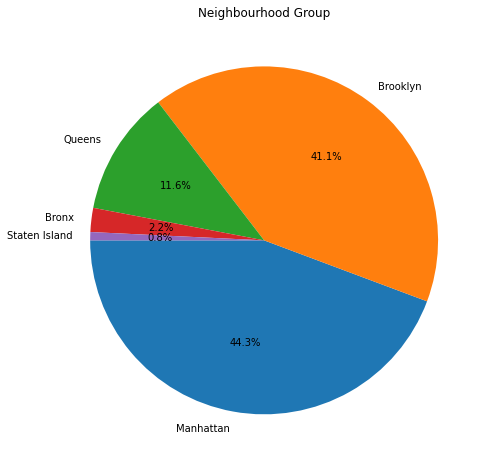

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Neighbourhood Group")
plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)

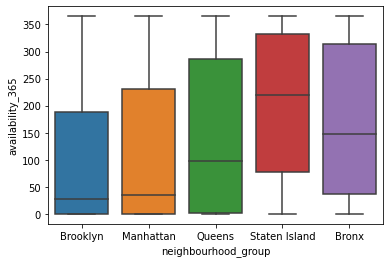

In [ ]:
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365')

In [ ]:
avg_price_nbd= airbnb_df.groupby(['neighbourhood_group','room_type'],dropna=True)['price'].mean().reset_index()
avg_price_nbd

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,126.266491
1,Bronx,Private room,63.751534
2,Bronx,Shared room,56.466667
3,Brooklyn,Entire home/apt,168.437389
4,Brooklyn,Private room,73.328563
5,Brooklyn,Shared room,50.225182
6,Manhattan,Entire home/apt,223.726797
7,Manhattan,Private room,109.401027
8,Manhattan,Shared room,87.310417
9,Queens,Entire home/apt,142.643130


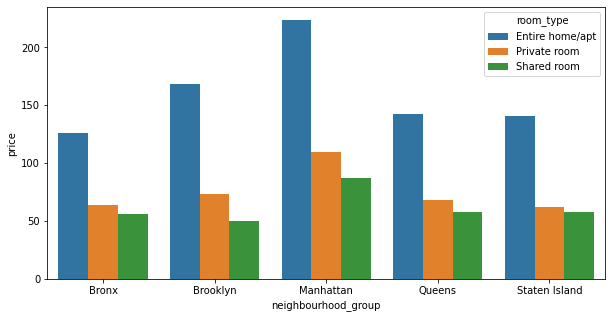

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group',y='price', hue='room_type', data=avg_price_nbd)
plt.show()

In [ ]:
airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,85.067828
1,Brooklyn,118.076055
2,Manhattan,178.575227
3,Queens,95.420755
4,Staten Island,99.329759


In [ ]:
def nbd_avg_price(df,x_axis,y_axis):
  group_price = df.groupby([x_axis],as_index=False)[y_axis].mean().reset_index(drop=True)
  plt.figure(figsize=(10,5))
  sns.barplot(x=group_price[x_axis],y=group_price[y_axis])
  plt.ylabel('mean ' + y_axis)
  plt.show()



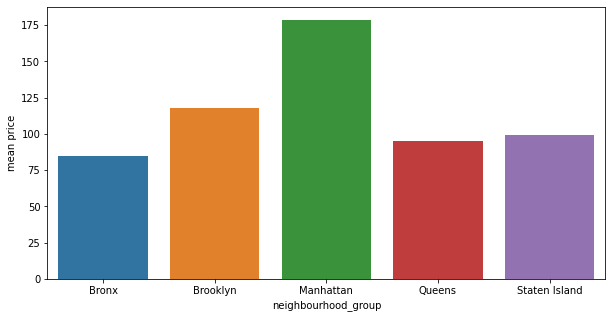

In [ ]:
nbd_avg_price(airbnb_df,'neighbourhood_group','price')

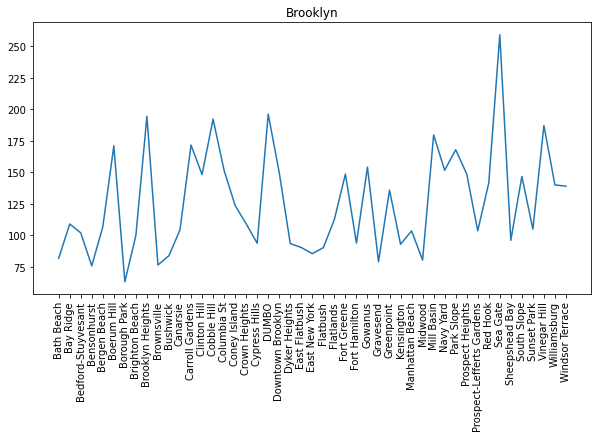

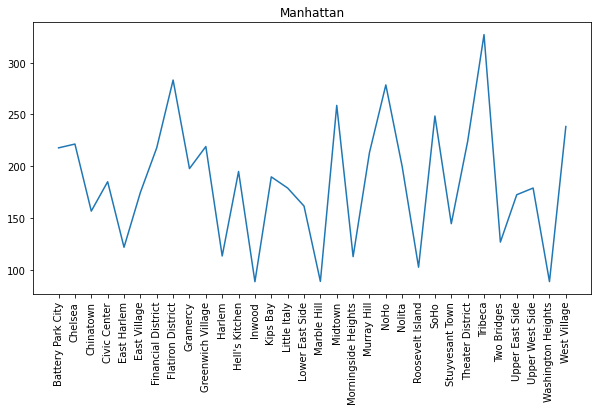

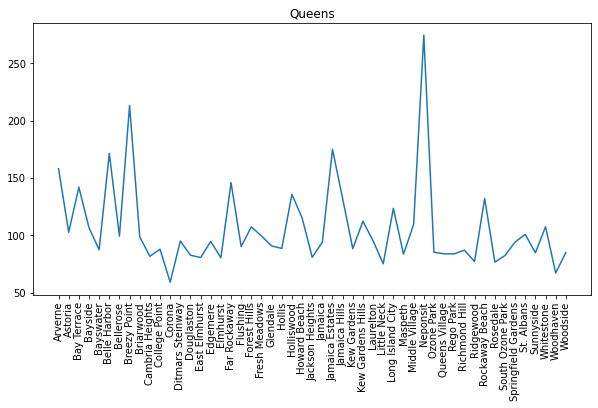

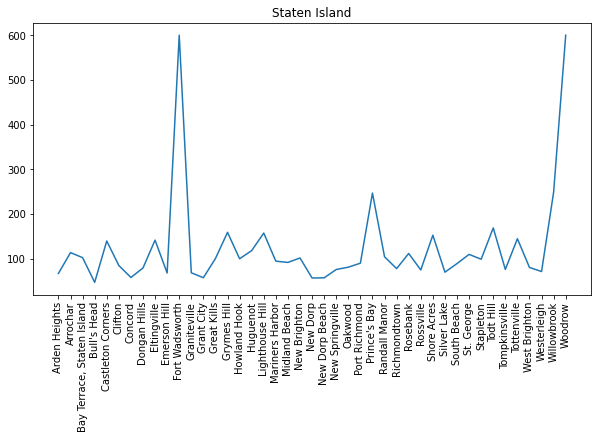

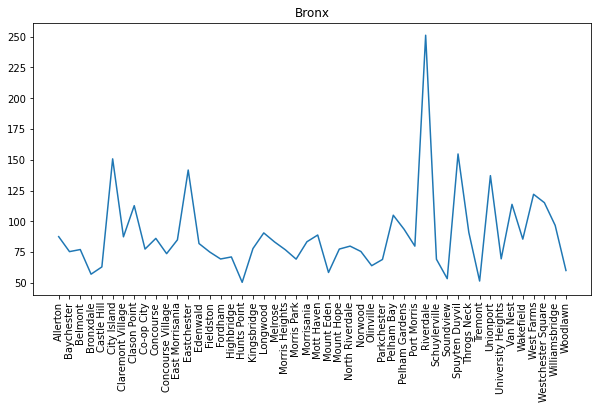

In [ ]:
for i in nbd_grp:
  nbd_price= airbnb_df[airbnb_df['neighbourhood_group']==i].groupby(['neighbourhood'])['price'].mean().reset_index(drop=False)
  nbd_price = pd.DataFrame(nbd_price)
  plt.figure(figsize=(10,5))
  plt.xticks(rotation=90)
  plt.title(i)
  plt.plot(nbd_price['neighbourhood'],nbd_price['price'])

In [ ]:
for i in nbd_grp:
  df_price=pd.DataFrame(airbnb_df['price'][airbnb_df['neighbourhood_group']==i])
  print(i)
  print(df_price.describe(),"\n")


Brooklyn
              price
count  20104.000000
mean     118.076055
std       90.754986
min        0.000000
25%       60.000000
50%       90.000000
75%      150.000000
max      600.000000 

Manhattan
              price
count  21661.000000
mean     178.575227
std      122.829107
min        0.000000
25%       95.000000
50%      150.000000
75%      220.000000
max      600.000000 

Queens
             price
count  5666.000000
mean     95.420755
std      73.264768
min      10.000000
25%      50.000000
50%      75.000000
75%     110.000000
max     600.000000 

Staten Island
            price
count  373.000000
mean    99.329759
std     89.573878
min     13.000000
25%     50.000000
50%     75.000000
75%    110.000000
max    600.000000 

Bronx
             price
count  1091.000000
mean     85.067828
std      73.370375
min       0.000000
25%      45.000000
50%      65.000000
75%      99.000000
max     600.000000 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


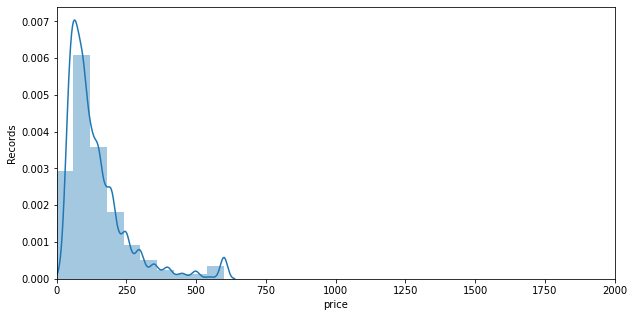

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Price')
plt.ylabel('Records')
sns.distplot(airbnb_df['price'],bins=10,kde=True)
plt.show()
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.

In [ ]:
famous_host = airbnb_df['host_id'].value_counts().head(20)
famous_host = pd.DataFrame(famous_host)
famous_host.reset_index(inplace=True)
famous_host.rename(columns={'index':'Host_id','host_id':'Count'},inplace=True)
famous_host.head(2)

,Host_id,Count
0,219517861,327
1,107434423,232


[Text(0, 0, '1475015'),
 Text(0, 0, '2119276'),
 Text(0, 0, '2856748'),
 Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '19303369'),
 Text(0, 0, '22541573'),
 Text(0, 0, '25237492'),
 Text(0, 0, '26377263'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '119669058'),
 Text(0, 0, '120762452'),
 Text(0, 0, '137358866'),
 Text(0, 0, '190921808'),
 Text(0, 0, '200380610'),
 Text(0, 0, '205031545'),
 Text(0, 0, '219517861')]

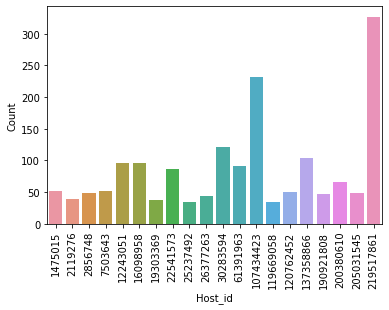

In [ ]:
plt1 = sns.barplot(x='Host_id',y='Count',data=famous_host)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

In [ ]:
top_host_id = famous_host['Host_id'][famous_host['Count']==famous_host['Count'].max()]
top_host_name = airbnb_df[['host_name','neighbourhood_group']][airbnb_df['host_id']==top_host_id[0]].head(1)
top_host_name


,host_name,neighbourhood_group
38293,Sonder (NYC),Manhattan


In [ ]:
airbnb_df[['neighbourhood_group','neighbourhood','room_type','price','availability_365']][airbnb_df['host_id']==top_host_id[0]]

,neighbourhood_group,neighbourhood,room_type,price,availability_365
38293,Manhattan,Financial District,Entire home/apt,302,309
38294,Manhattan,Financial District,Entire home/apt,229,219
38588,Manhattan,Financial District,Entire home/apt,232,159
39769,Manhattan,Murray Hill,Entire home/apt,262,91
39770,Manhattan,Murray Hill,Entire home/apt,255,81
...,...,...,...,...,...
47691,Manhattan,Financial District,Entire home/apt,135,339
47692,Manhattan,Financial District,Entire home/apt,165,342
47693,Manhattan,Financial District,Entire home/apt,165,347
47814,Manhattan,Financial District,Entire home/apt,600,327


In [ ]:
top_reviewed_place=airbnb_df.nlargest(10,'number_of_reviews')
top_reviewed_place.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,342


In [ ]:
price_avrg=top_reviewed_place.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


In [ ]:
nor_host = airbnb_df.groupby(['host_id','host_name'])['number_of_reviews'].max().reset_index()
nor_host = nor_host.sort_values(['number_of_reviews'],ascending=False).head(10)
nor_host


,host_id,host_name,number_of_reviews
23486,47621202,Dona,629
7362,4734398,Jj,607
21304,37312959,Maya,543
4367,2369681,Carol,540
18626,26432133,Danielle,510
13109,12949460,Asa,488
1864,792159,Wanda,480
4818,2680820,Linda,474
147,42273,Dani,467
17517,23591164,Angela,466


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Dona'),
 Text(0, 0, 'Jj'),
 Text(0, 0, 'Maya'),
 Text(0, 0, 'Carol'),
 Text(0, 0, 'Danielle'),
 Text(0, 0, 'Asa'),
 Text(0, 0, 'Wanda'),
 Text(0, 0, 'Linda'),
 Text(0, 0, 'Dani'),
 Text(0, 0, 'Angela')]

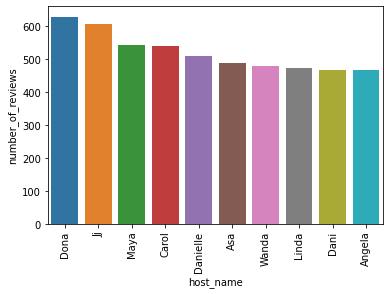

In [ ]:
plt2 = sns.barplot(nor_host['host_name'],nor_host['number_of_reviews'])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)

In [ ]:
nor_nbd_grp = airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
nor_nbd_grp

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,271
1,Bronx,Private room,321
2,Bronx,Shared room,116
3,Brooklyn,Entire home/apt,488
4,Brooklyn,Private room,480
5,Brooklyn,Shared room,236
6,Manhattan,Entire home/apt,447
7,Manhattan,Private room,607
8,Manhattan,Shared room,229
9,Queens,Entire home/apt,441


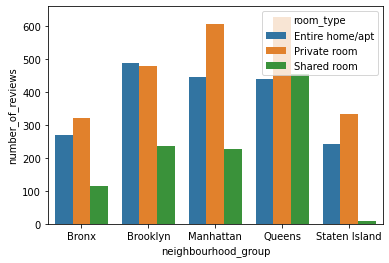

In [ ]:
sns.barplot(x=nor_nbd_grp['neighbourhood_group'],hue=nor_nbd_grp['room_type'],y=nor_nbd_grp['number_of_reviews'])